In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm

In [2]:
df = yf.download('WMT', start='2019-01-01', end='2022-01-01')

[*********************100%%**********************]  1 of 1 completed


(array([  2.,   1.,  12.,  98., 502., 124.,   9.,   3.,   4.,   1.]),
 array([-9.74557495, -7.59741745, -5.44925995, -3.30110245, -1.15294495,
         0.99521255,  3.14337006,  5.29152756,  7.43968506,  9.58784256,
        11.73600006]),
 <BarContainer object of 10 artists>)

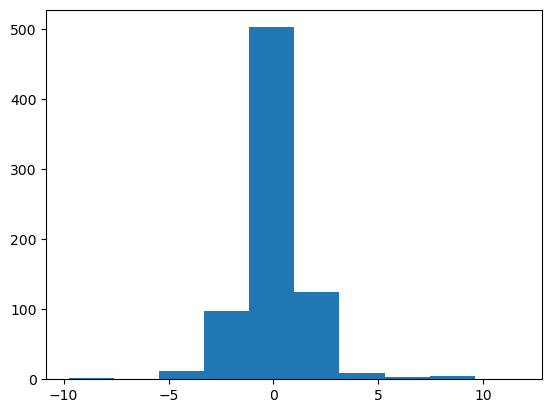

In [3]:
prices = df['Adj Close'].to_numpy()
plt.hist(df['Adj Close'].diff(1))

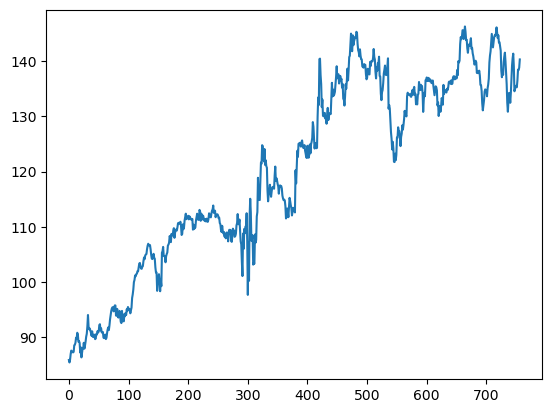

In [4]:
plt.plot(prices)

In [5]:
incd = np.diff(prices) / prices[:-1] 
sigma = incd.std() * np.sqrt(252)
mu = incd.mean() * 252

T = 3                  # Years
N = 4	               # Quarters
S = prices[0]          # Start price
K = S                  # Strike price
u = np.exp(sigma)      # Up gain
d = 1 / u              # Down loss
R = 1 + .05            # Risk free profit
p = (R - d) / (u - d)  # Probability of gain

S 85.89545440673828
K 85.89545440673828
u 1.248471445877916
d 0.8009794723793681
p 0.5564804339924994


(array([  1.,   2.,   9., 136., 536.,  61.,   4.,   4.,   1.,   2.]),
 array([-0.09071049, -0.06993093, -0.04915138, -0.02837183, -0.00759227,
         0.01318728,  0.03396683,  0.05474639,  0.07552594,  0.09630549,
         0.11708505]),
 <BarContainer object of 10 artists>)

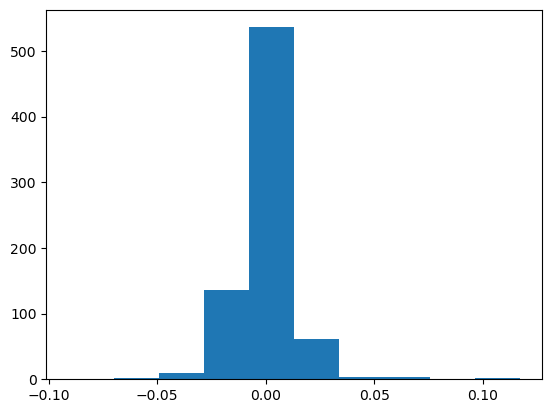

In [6]:
print(f'S {S}\nK {K}\nu {u}\nd {d}\np {p}')
plt.hist(incd)

In [7]:
def binomCall(price, i=1, route=''):
    print(f"{route if route != '' else 'start'}: {price}")

    if i >= N:
        return max(price - K, 0)

    U = binomCall(price * u, i+1, route + 'u')
    D = binomCall(price * d, i+1, route + 'd')

    return 1 / R * (U * p +  D * (1-p))


def binomPut(price, i=1, route=''):
    print(f"{route if route != '' else 'start'}: {price}")

    if i >= N:
        return max(K - price, 0)

    U = binomPut(price * u, i+1, route + 'u')
    D = binomPut(price * d, i+1, route + 'd')

    return 1 / R * (U * p +  D * (1-p))

In [8]:
C = binomCall(S)
print(f'Premium Call {C}')

start: 85.89545440673828
u: 107.23802215752116
uu: 133.88360857608845
uuu: 167.1498623783421
uud: 107.23802215752116
ud: 85.89545440673828
udu: 107.23802215752116
udd: 68.80049575049529
d: 68.80049575049529
du: 85.89545440673827
duu: 107.23802215752114
dud: 68.80049575049529
dd: 55.10778478567067
ddu: 68.80049575049529
ddd: 44.140204381622254
Premium Call 19.692120251379603


In [9]:
P = binomPut(S)
print(f'Premim Put {P}')

start: 85.89545440673828
u: 107.23802215752116
uu: 133.88360857608845
uuu: 167.1498623783421
uud: 107.23802215752116
ud: 85.89545440673828
udu: 107.23802215752116
udd: 68.80049575049529
d: 68.80049575049529
du: 85.89545440673827
duu: 107.23802215752114
dud: 68.80049575049529
dd: 55.10778478567067
ddu: 68.80049575049529
ddd: 44.140204381622254
Premim Put 7.996388904127995


In [10]:
print(f'{round(S - K / (R ** (N-1)), 3)} : {round(C - P, 3)}')    # Parity formula

11.696 : 11.696


In [14]:
d1 = (np.log(S / K) + ((R-1) + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

C = S * norm.cdf(d1) - K * np.exp((1-R) * T) * norm.cdf(d2)
print(f'Black Scholes Call price {C}')

Black Scholes Call price 19.063922723650975
